## Titanic - Machine Learning from Disaster

In [1]:
#imoprt data and viz libraries 

import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
## Load our Train and Test Data

train = pd.read_csv('../data/train.csv')
test  = pd.read_csv('../data/test.csv')

In [3]:
print(train.shape, test.shape)

(891, 12) (418, 11)


In [4]:
## Before starting with the EDA , lets do go for LayMan Approach. As our Kaggle Evaluation is based on Accuracy Score.

## Layman Approach -- Assume all passengers in test set survived / dead 

## Assumption 0 all dead :(

layman0_submission = test[["PassengerId"]].copy()
layman0_submission['Survived'] = 0
layman0_submission.to_csv('../data/Laymam_all_dead.csv',index=False)

# Assumption 1 all survived :D

layman1_submission = test[["PassengerId"]].copy()
layman1_submission['Survived'] = 1
layman1_submission.to_csv('../data/Laymam_all_survived.csv',index=False)

+++ Results +++

Public Score Accuracy

- Layman approach all dead ----------- 0.62200
- Layman approach all survived ------- 0.37799

```

Layman Conclusion :
We can conclude that the total number of people who Died > total number of people survived for our test dataset. 
Just by using a Layman all-dead hypothesis test, we can achieve an accuracy of approximately 62% on our test data.
```

### Exploratory Data Analysis on training Data

In [5]:
## View sample of our training data
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
## Get insights on training data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
## Get insights on test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
## Check for Null values in training data 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
## Check for Null values in testing data 
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Plotting some Visualizations about the features on our training dataset -

In [10]:
## Function to plot bar charts
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

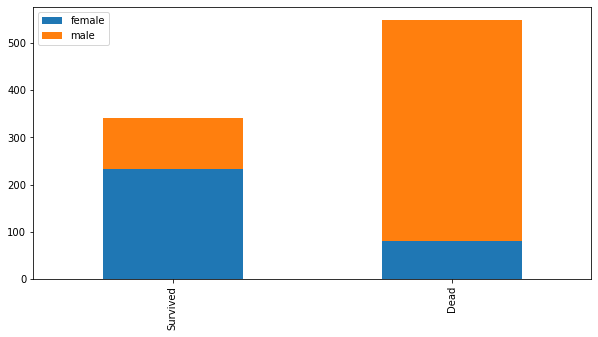

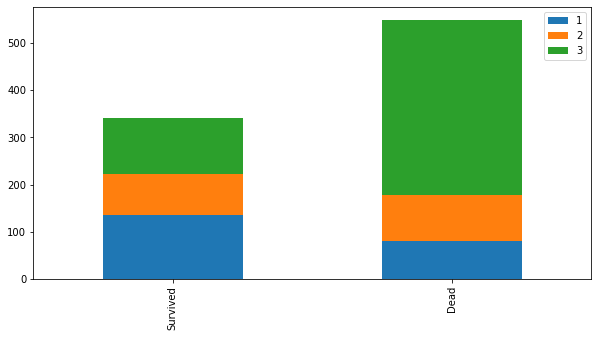

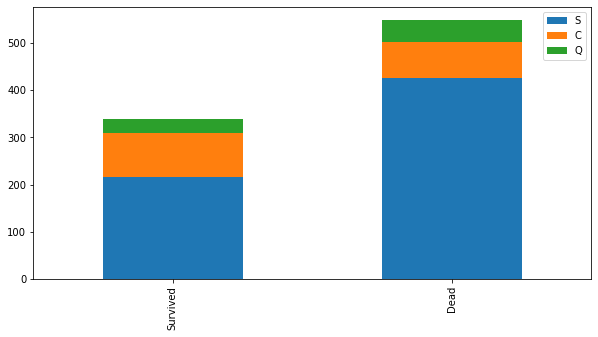

In [11]:
bar_chart('Sex')
bar_chart('Pclass')
bar_chart('Embarked')

#### Feature engineering

In [12]:
# Commbining train and test data for feature engg.
all_data = [train,test]

# Check Title of each individual on basis of their name
for data in all_data :
    data['Status'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
train.Status.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [13]:
# Adding Status of each individual on basis of their name
for dataset in all_data:
    ## Assign Rare title to all the vip personnel on the ship
    dataset['Status'] = dataset['Status'].replace(['Lady', 'Countess','Capt', 'Col',\
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    ## Correct spelling mistakes in title for remaining individuals
    dataset['Status'] = dataset['Status'].replace('Mlle', 'Miss')
    dataset['Status'] = dataset['Status'].replace('Ms', 'Miss')
    dataset['Status'] = dataset['Status'].replace('Mme', 'Mrs')

In [14]:
# Mapping Status of each individual on basis of their name
status_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in all_data:
    dataset['Status'] = dataset['Status'].map(status_mapping)
    dataset['Status'] = dataset['Status'].fillna(0)

In [15]:
# Mapping FamilySize column by summing Siblings + ParentChild + Individual 
train['FamilySize'] = train ['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test ['SibSp'] + test['Parch'] + 1

In [16]:
## Adding isAlone column if individual was travelling without family    
for dataset in all_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [17]:
## Adding Cabin Category
train['Cabin_category'] = train['Cabin'].astype(str).str[0]
train['Cabin_category'] = train['Cabin_category'].map({'A':1,'B':2,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7})
train['Cabin_category'] = train['Cabin_category'].fillna(0)
# Cabin Grouping 
train['HasCabin'] = train['Cabin'].apply(lambda x:0 if x is np.nan else 1)


test['Cabin_category'] = test['Cabin'].astype(str).str[0]
test['Cabin_category'] = test['Cabin_category'].map({'A':1,'B':2,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7})
test['Cabin_category'] = test['Cabin_category'].fillna(0)
# Cabin Grouping 
test['HasCabin'] = test['Cabin'].apply(lambda x:0 if x is np.nan else 1)

#### Filling in missing data on Age, Fare and Embarked features -

In [18]:
## Filling up missing Age values by taking a median
train["Age"].fillna(train.groupby("Status")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Status")["Age"].transform("median"), inplace=True)


## Filling up missing Fare values by taking a median on Pclass of an individual
train['Fare'].fillna(train.groupby(['Pclass', 'Parch', 'SibSp'])['Fare'].median()[3][0][0], inplace = True)
test['Fare'].fillna(test.groupby(['Pclass', 'Parch', 'SibSp'])['Fare'].median()[3][0][0], inplace = True)

## Filling up missing Embarked values by replacing them with 'S' based on assumption that most people boarded from Southampton
train['Embarked'].fillna('S', inplace = True)
test['Embarked'].fillna('S', inplace = True)

In [19]:
## Check for Null values in training data 
train.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            0
Status              0
FamilySize          0
IsAlone             0
Cabin_category      0
HasCabin            0
dtype: int64

In [20]:
## Check for Null values in testing data 
test.isnull().sum()

PassengerId         0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             327
Embarked            0
Status              0
FamilySize          0
IsAlone             0
Cabin_category      0
HasCabin            0
dtype: int64

#### Encoding Categorical  Data

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
train["Sex"]= le.fit_transform(train["Sex"])
test["Sex"]= le.fit_transform(test["Sex"])

train["Embarked"]= le.fit_transform(train["Embarked"])
test["Embarked"]= le.fit_transform(test["Embarked"])

In [24]:
## Final insights on training Dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    int32  
 5   Age             891 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        891 non-null    int32  
 12  Status          891 non-null    int64  
 13  FamilySize      891 non-null    int64  
 14  IsAlone         891 non-null    int64  
 15  Cabin_category  891 non-null    float64
 16  HasCabin        891 non-null    int64  
dtypes: float64(3), int32(2), int64(9), 

#### Training our model and making predictions

In [25]:
# Models from SCikit -Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [27]:
y_full = train["Survived"]

features = ["Pclass","Sex", "Age","Fare","Embarked","IsAlone", "FamilySize", "Status","Cabin_category","HasCabin"]

X_full = train[features]
X_test_full = test[features]

In [28]:
## Splitting our dataset 
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, train_size=0.7, test_size=0.3,random_state=0)

In [29]:
# Create directory for different models

models = { "Logistic Regression": LogisticRegression(),
            "Naive Bayes": GaussianNB(),
            "Stochastic Gradient": SGDClassifier(),
            "KNeighbors Classifier": KNeighborsClassifier(),
            "DecisionTree Classifier": DecisionTreeClassifier(),
            "RandomForest Classifier": RandomForestClassifier(),
            "Support Vector Machine": SVC()}



# Create a function to fit and score models
def fit_and_score(models, X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different SCikit-Learn machine learning models
    X_train : training data(no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # set random seeed
    np.random.seed(0)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [30]:
## Train our data on different classifiers 

model_scores = fit_and_score(models=models,
                             X_train= X_train,
                             X_test= X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'Logistic Regression': 0.8171641791044776,
 'Naive Bayes': 0.7761194029850746,
 'Stochastic Gradient': 0.7798507462686567,
 'KNeighbors Classifier': 0.7611940298507462,
 'DecisionTree Classifier': 0.7947761194029851,
 'RandomForest Classifier': 0.8246268656716418,
 'Support Vector Machine': 0.7164179104477612}

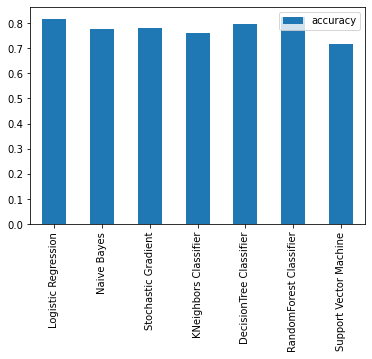

In [31]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

####  Hyerparameter Tuning for Random Forest model as we have best acc score for classifier

In [32]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": np.arange(1, 50, 2),
           "min_samples_split": np.arange(2, 50, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [33]:
# Tune RandomForestClassifier
# Setup random seed
np.random.seed(3)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True, n_jobs=-1)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [34]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 160,
 'min_samples_split': 20,
 'min_samples_leaf': 1,
 'max_depth': 27}

In [35]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8246268656716418

#### Further Hyperparamter Tuning on RF with GridSearchCV

In [36]:
# Different hyperparameters for our RandomForestClassifier model
rf_grid = {"n_estimators": np.arange(100, 300, 50),
           "max_depth": np.arange(10,20, 2),
           "min_samples_split": np.arange(20,30, 2),
           "min_samples_leaf": np.arange(2, 10, 2),
          "random_state": [0] }

# Setup grid hyperparameter search for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid,
                          cv=5,
                          verbose=True,n_jobs=-1)

# Fit grid hyperparameter search model
gs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


In [37]:
# Check the best hyperparmaters
gs_rf.best_params_

{'max_depth': 16,
 'min_samples_leaf': 2,
 'min_samples_split': 20,
 'n_estimators': 250,
 'random_state': 0}

In [38]:
# Evaluate the GridSearchCV search RandomForestClassifier model
gs_rf.score(X_test, y_test)

0.8208955223880597

#### Final RF model with Accuracy

In [42]:
clf = RandomForestClassifier(n_estimators = 250, max_depth = 16, min_samples_split = 20, min_samples_leaf = 2)

clf.fit(X_train, y_train)

clf_val_predictions = clf.predict(X_test)

clf_accuracy = accuracy_score(clf_val_predictions,y_test)

clf_accuracy

0.8283582089552238

#### Predicting and Exporting our final submission

In [43]:
clf.fit(X_full, y_full)
predictions = clf.predict(X_test_full)

In [44]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('../data/Tuned_RF_Model.csv', index=False)

+++ Results +++

Kaggle Public Score Accuracy

- Tuned_RF_Model.csv ---------- 0.77272